<a href="https://colab.research.google.com/github/ahamedafzal/Customer_churn_prediction/blob/main/Customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer churn prediction**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
df=pd.read_csv("/content/drive/MyDrive/Data sets/e_commerce.csv")
df=df.drop(["CustomerID"],axis=1)
df

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


# **Introduction**

This is a dataset of leading ecommerce company and we have to analyse who are churn(leaving the company service) and have to make predicting churn model.

# **Features**
**CustomerID** : Unique customer ID  
**Churn** :Churn Flag     
**Tenure** : Tenure of customer in organization                    
**PreferredLoginDevice** : Preferred login device of customer      
**CityTier** : City tier    
**WarehouseToHome** : Distance in between warehouse to home of customer
**PreferredPaymentMode** : Preferred payment method of customer   
**Gender** : Gender of customer    
**HourSpendOnApp** : Number of hours spend on mobile application or website
**NumberOfDeviceRegistered** : Total number of deceives is registered on particular customer    
**PreferedOrderCat** : Preferred order category of customer in last month
**SatisfactionScore** : Satisfactory score of customer on service  
**MaritalStatus** : Marital status of customer   
**NumberOfAddress** : Total number of added added on particular customer
**Complain** : Any complaint has been raised in last month
**OrderAmountHikeFromlastYear** : Percentage increases in order from last year
**CouponUsed** : Total number of coupon has been used in last month  
**OrderCount** : Total number of orders has been places in last month
**DaySinceLastOrder** : Day Since last order by customer    
**CashbackAmount** : Average cashback in last month

# **Goal**

Build a predictive model that can accurately identify customers who are churn,based on the provided variables. This can help the company take proactive steps to  reduce the rate of churn.

**Dataset overview**

In [ ]:
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [ ]:
df.shape

(5630, 19)

There are two lakh fifty thousand rows and twelve feature coloumns

In [ ]:
df.dtypes

Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                   int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

Look for any missing values

In [ ]:
df.isna().sum()

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

Filling the missing values

In [ ]:
columns_mean=["WarehouseToHome","HourSpendOnApp","OrderAmountHikeFromlastYear","CouponUsed"]
for col in columns_mean:
  df[col]=df[col].fillna(df[col].mean())
columns_mode=["Tenure","OrderCount","DaySinceLastOrder"]
for col in columns_mode:
  df[col]=df[col].fillna(df[col].mode()[0])
df.isna().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [ ]:
df.nunique()

Churn                            2
Tenure                          36
PreferredLoginDevice             3
CityTier                         3
WarehouseToHome                 35
PreferredPaymentMode             7
Gender                           2
HourSpendOnApp                   7
NumberOfDeviceRegistered         6
PreferedOrderCat                 6
SatisfactionScore                5
MaritalStatus                    3
NumberOfAddress                 15
Complain                         2
OrderAmountHikeFromlastYear     17
CouponUsed                      18
OrderCount                      16
DaySinceLastOrder               22
CashbackAmount                 220
dtype: int64

In [ ]:
columns_not_numeric=df.select_dtypes(exclude=np.number).columns
columns_not_numeric

Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')

In [ ]:
column_val=["Churn","PreferredLoginDevice","CityTier","PreferredPaymentMode","Gender","PreferedOrderCat",
            "SatisfactionScore","MaritalStatus"]
for col in column_val:
  print(col,":",df[col].unique())
  print("\n")
  print(df[col].value_counts())
  print("---------------------------------------------------------------------------------")

Churn : [1 0]


0    4682
1     948
Name: Churn, dtype: int64
---------------------------------------------------------------------------------
PreferredLoginDevice : ['Mobile Phone' 'Phone' 'Computer']


Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64
---------------------------------------------------------------------------------
CityTier : [3 1 2]


1    3666
3    1722
2     242
Name: CityTier, dtype: int64
---------------------------------------------------------------------------------
PreferredPaymentMode : ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']


Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64
---------------------------------------------------------------------------------
Gender : ['Female' 'Male']


Male      3384
Fema

Here we can see that,
Mobile phone and phone are same in PreferreLoginDevice column & Mobile and mobile phone are same in PreferreOrederCat column & CC and Credit Card are same in PreferedPaymentMode column & COD and Cash on Delivery are same in PreferredPaymentMode column

In [ ]:
df.loc[df['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Mobile Phone'
df.loc[df["PreferedOrderCat"]=="Mobile","PreferedOrderCat"]="Mobile Phone"
#CC and Credit card are same
df.loc[df["PreferredPaymentMode"]=="CC","PreferredPaymentMode"]="Credit Card"
df.loc[df["PreferredPaymentMode"]=="COD","PreferredPaymentMode"]="Cash on Delivery"
df["PreferredPaymentMode"].value_counts()

Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: PreferredPaymentMode, dtype: int64

In [ ]:
df["PreferredLoginDevice"].value_counts()

Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64

In [ ]:
df["PreferedOrderCat"].value_counts()

Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

Encoding is performed to convert categorical values to numerical

In [ ]:
encoder=LabelEncoder()
for col in columns_not_numeric:
  df[col]=encoder.fit_transform(df[col])

df.dtypes

Churn                            int64
Tenure                         float64
PreferredLoginDevice             int64
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode             int64
Gender                           int64
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                 int64
SatisfactionScore                int64
MaritalStatus                    int64
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                   int64
dtype: object

In [ ]:
df.describe().T.style.background_gradient(cmap="Blues",subset=["mean","min","max"])

,count,mean,std,min,25%,50%,75%,max
Churn,5630.000000,0.168384,0.374240,0.000000,0.000000,0.000000,0.000000,1.000000
Tenure,5630.000000,9.758970,8.577134,0.000000,1.000000,8.000000,15.000000,61.000000
PreferredLoginDevice,5630.000000,0.709769,0.453909,0.000000,0.000000,1.000000,1.000000,1.000000
CityTier,5630.000000,1.654707,0.915389,1.000000,1.000000,1.000000,3.000000,3.000000
WarehouseToHome,5630.000000,15.639896,8.339095,5.000000,9.000000,14.000000,20.000000,127.000000
PreferredPaymentMode,5630.000000,1.758437,1.012576,0.000000,1.000000,2.000000,2.000000,4.000000
Gender,5630.000000,0.601066,0.489723,0.000000,0.000000,1.000000,1.000000,1.000000
HourSpendOnApp,5630.000000,2.931535,0.705384,0.000000,2.000000,3.000000,3.000000,5.000000
NumberOfDeviceRegistered,5630.000000,3.688988,1.023999,1.000000,3.000000,4.000000,4.000000,6.000000
PreferedOrderCat,5630.000000,2.096980,1.098866,0.000000,2.000000,2.000000,3.000000,4.000000


In [ ]:
df.corr()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
Churn,1.000000,-0.345379,-0.051099,0.084703,0.073497,0.002345,0.029264,0.018126,0.107939,0.104569,0.105481,0.140316,0.043931,0.250188,-0.009949,-0.008197,-0.024038,-0.155871,-0.154161
Tenure,-0.345379,1.000000,0.041531,-0.045402,-0.010073,-0.003453,-0.048018,0.014225,-0.001538,-0.218219,-0.019529,-0.105986,0.247700,-0.018463,0.012678,0.145466,0.184359,0.199680,0.506659
PreferredLoginDevice,-0.051099,0.041531,1.000000,0.002476,-0.023328,0.006681,-0.015871,0.019566,-0.021096,0.005152,0.036049,-0.028785,0.025863,0.001327,-0.010775,-0.010495,-0.014327,0.002251,0.047822
CityTier,0.084703,-0.045402,0.002476,1.000000,0.010445,0.246170,-0.025176,-0.008982,0.027934,-0.170513,-0.011554,0.006818,-0.029440,0.003375,-0.030811,0.021009,0.033551,0.010214,0.055698
WarehouseToHome,0.073497,-0.010073,-0.023328,0.010445,1.000000,0.006478,-0.001038,0.058605,0.018641,-0.073370,0.007537,-0.012789,-0.010782,0.027969,0.036999,-0.003641,-0.003340,0.015414,-0.009278
PreferredPaymentMode,0.002345,-0.003453,0.006681,0.246170,0.006478,1.000000,0.016999,-0.004090,0.015938,-0.032268,-0.014640,-0.021391,-0.004544,0.023890,-0.000778,-0.001081,-0.029976,-0.001047,0.037280
Gender,0.029264,-0.048018,-0.015871,-0.025176,-0.001038,0.016999,1.000000,-0.018349,-0.021799,0.062003,-0.035220,-0.017370,-0.031492,-0.040269,-0.000292,-0.037642,-0.026933,-0.020152,-0.025245
HourSpendOnApp,0.018126,0.014225,0.019566,-0.008982,0.058605,-0.004090,-0.018349,1.000000,0.307749,0.037363,0.031156,-0.039742,0.141736,0.006824,0.101893,0.182959,0.103675,0.063337,0.118629
NumberOfDeviceRegistered,0.107939,-0.001538,-0.021096,0.027934,0.018641,0.015938,-0.021799,0.307749,1.000000,-0.011239,-0.017228,0.033645,0.084997,0.003407,0.068148,0.148638,0.099790,0.007350,0.137396
PreferedOrderCat,0.104569,-0.218219,0.005152,-0.170513,-0.073370,-0.032268,0.062003,0.037363,-0.011239,1.000000,-0.003803,0.042845,-0.085969,-0.007004,-0.002832,-0.146088,-0.144649,-0.160181,-0.332322


<Axes: >

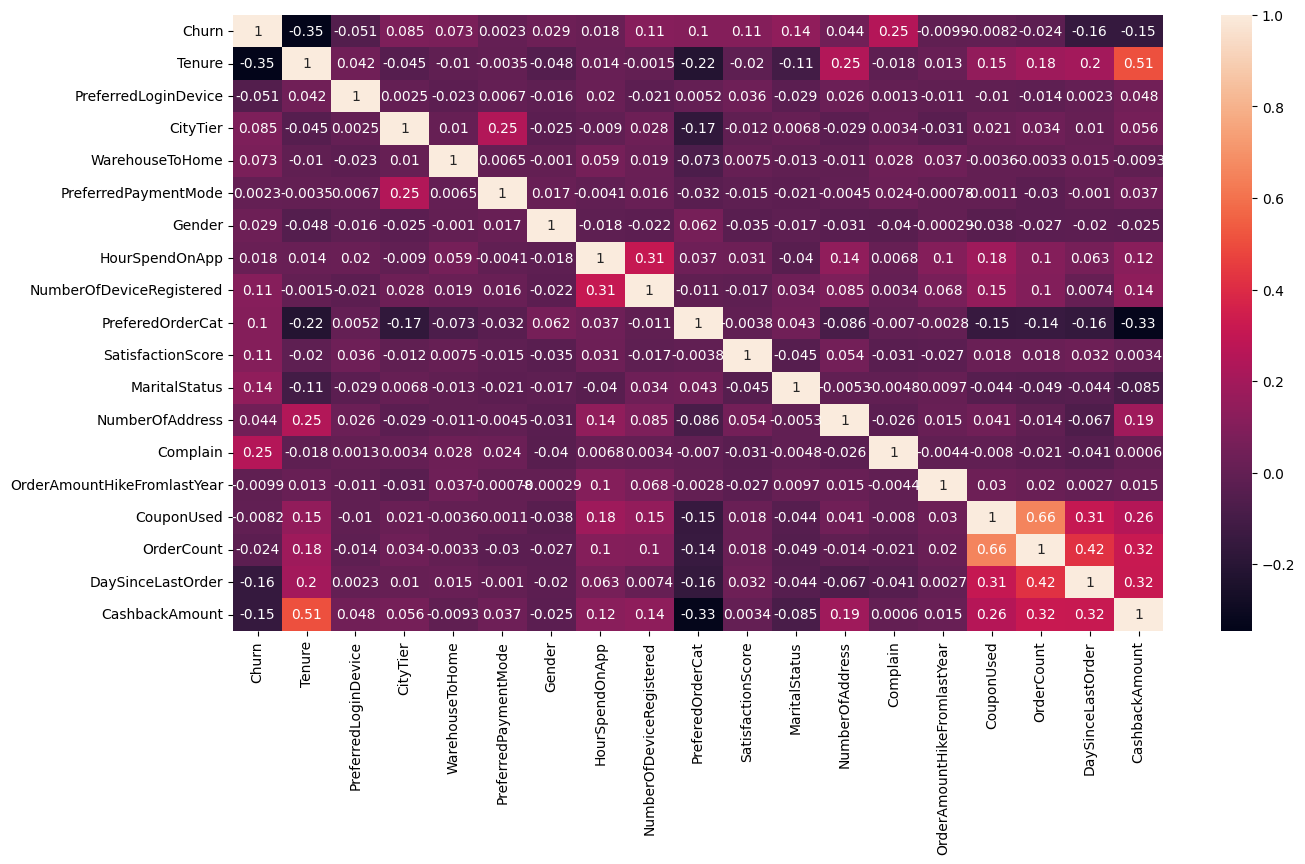

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot =True)

In [ ]:
churn_corr_vector = df.corr()['Churn'].sort_values(ascending = False)
churn_corr_vector

Churn                          1.000000
Complain                       0.250188
MaritalStatus                  0.140316
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
PreferedOrderCat               0.104569
CityTier                       0.084703
WarehouseToHome                0.073497
NumberOfAddress                0.043931
Gender                         0.029264
HourSpendOnApp                 0.018126
PreferredPaymentMode           0.002345
CouponUsed                    -0.008197
OrderAmountHikeFromlastYear   -0.009949
OrderCount                    -0.024038
PreferredLoginDevice          -0.051099
CashbackAmount                -0.154161
DaySinceLastOrder             -0.155871
Tenure                        -0.345379
Name: Churn, dtype: float64

Text(0.5, 1.0, 'Relation Between Features and target')

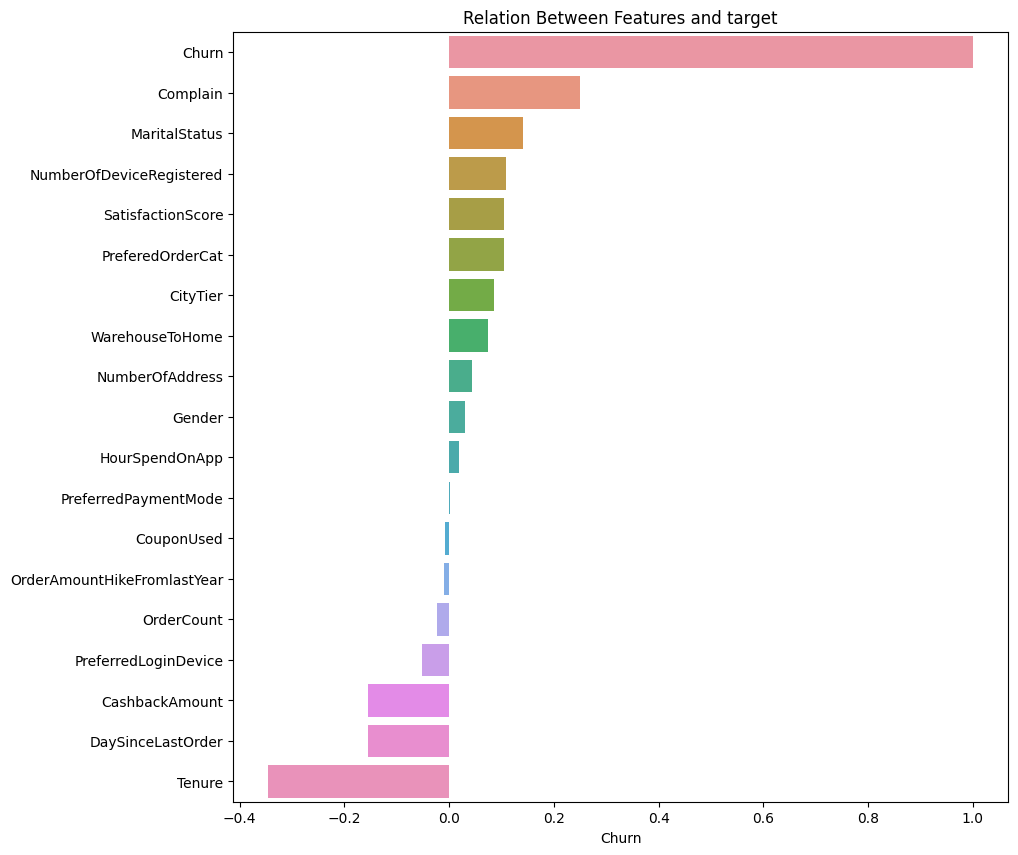

In [ ]:
plt.figure(figsize = (10,10))
sns.barplot(x = churn_corr_vector , y = churn_corr_vector.index)
plt.title('Relation Between Features and target')

**FEATURE SELECTION**

In [ ]:
df=df.drop(["CouponUsed","OrderAmountHikeFromlastYear"],axis=1)

In [ ]:
df["Churn"].value_counts()

0    4682
1     948
Name: Churn, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

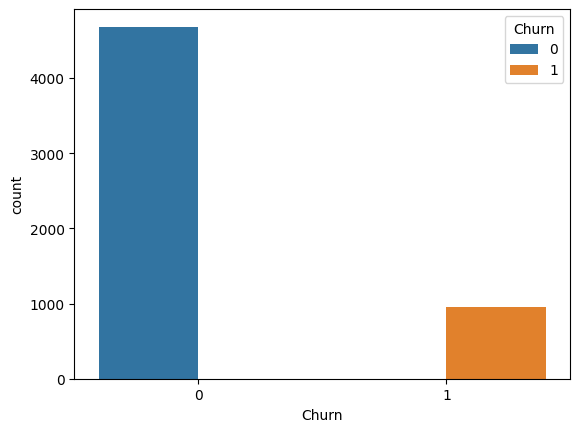

In [ ]:
sns.countplot(x="Churn",data=df,hue="Churn")

In [ ]:
X=df.iloc[:,1:]
X

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderCount,DaySinceLastOrder,CashbackAmount
0,4.0,1,3,6.0,2,0,3.000000,3,2,2,2,9,1,1.0,5.0,160
1,1.0,1,1,8.0,4,1,3.000000,4,3,3,2,7,1,1.0,0.0,121
2,1.0,1,1,30.0,2,1,2.000000,4,3,3,2,6,1,1.0,3.0,120
3,0.0,1,3,15.0,2,1,2.000000,4,2,5,2,8,0,1.0,3.0,134
4,0.0,1,1,12.0,1,1,2.931535,3,3,5,2,3,0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,10.0,0,1,30.0,1,1,3.000000,2,2,1,1,6,0,2.0,4.0,151
5626,13.0,1,1,13.0,1,1,3.000000,5,0,5,1,6,0,2.0,3.0,225
5627,1.0,1,1,11.0,2,1,3.000000,2,2,4,1,3,1,2.0,4.0,186
5628,23.0,0,3,9.0,1,1,4.000000,5,2,4,1,4,0,2.0,9.0,179


In [ ]:
y=df.iloc[:,0]
y

0       1
1       1
2       1
3       1
4       1
       ..
5625    0
5626    0
5627    0
5628    0
5629    0
Name: Churn, Length: 5630, dtype: int64

**OVER SAMPLING**

In [ ]:
os=SMOTE()
X_os,y_os=os.fit_resample(X,y)

In [ ]:
y_os.value_counts()

1    4682
0    4682
Name: Churn, dtype: int64

In [ ]:
X_os

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderCount,DaySinceLastOrder,CashbackAmount
0,4.000000,1,3,6.000000,2,0,3.000000,3,2,2,2,9,1,1.000000,5.000000,160
1,1.000000,1,1,8.000000,4,1,3.000000,4,3,3,2,7,1,1.000000,0.000000,121
2,1.000000,1,1,30.000000,2,1,2.000000,4,3,3,2,6,1,1.000000,3.000000,120
3,0.000000,1,3,15.000000,2,1,2.000000,4,2,5,2,8,0,1.000000,3.000000,134
4,0.000000,1,1,12.000000,1,1,2.931535,3,3,5,2,3,0,1.000000,3.000000,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9359,1.000000,1,3,7.000000,0,0,4.000000,4,3,4,2,3,1,2.000000,5.000000,157
9360,1.000000,0,1,17.000000,1,1,4.000000,4,0,3,1,8,0,2.000000,3.000000,225
9361,1.055671,0,3,11.000000,0,1,3.000000,4,0,4,2,2,0,5.041753,3.000000,220
9362,7.000000,0,1,15.639896,1,1,2.000000,3,3,4,1,4,0,1.290767,2.290767,123


**Scaling**

In [ ]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X_os)
X_scaled

array([[0.06557377, 1.        , 1.        , ..., 0.        , 0.10869565,
        0.49230769],
       [0.01639344, 1.        , 0.        , ..., 0.        , 0.        ,
        0.37230769],
       [0.01639344, 1.        , 0.        , ..., 0.        , 0.06521739,
        0.36923077],
       ...,
       [0.01730608, 0.        , 1.        , ..., 0.2694502 , 0.06521739,
        0.67692308],
       [0.1147541 , 0.        , 0.        , ..., 0.01938444, 0.04979927,
        0.37846154],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.38153846]])

**SPLIT DATA**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y_os,test_size=0.3,random_state=1)

**MODELING**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
lr=LogisticRegression()
knn=KNeighborsClassifier(n_neighbors=3,algorithm="auto",weights="distance")
svc=SVC()
dtree=DecisionTreeClassifier(criterion="entropy")
rf=RandomForestClassifier(random_state=1)
ab=AdaBoostClassifier(random_state=1)

**Hyper parameter tuning**

In [ ]:
param={"n_neighbors":[3,5,7],"weights":["uniform","distance"],"algorithm":["auto","ball_tree","kd_tree","brute"]}
clf=GridSearchCV(knn,param,cv=10,scoring="accuracy")
clf.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=KNeighborsClassifier(n_neighbors=3, weights='distance'),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}


In [ ]:
accuracy=[]
models=[lr,knn,svc,dtree,rf,ab]
for model in models:
  print("*****************",model,"******************")
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))
  print("accuracy :",accuracy_score(y_test,y_pred))
  accuracy.append(accuracy_score(y_test,y_pred))

***************** LogisticRegression() ******************
              precision    recall  f1-score   support

           0       0.80      0.73      0.76      1390
           1       0.76      0.82      0.79      1420

    accuracy                           0.78      2810
   macro avg       0.78      0.78      0.78      2810
weighted avg       0.78      0.78      0.78      2810

accuracy : 0.7775800711743772
***************** KNeighborsClassifier(n_neighbors=3, weights='distance') ******************
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1390
           1       0.90      0.96      0.93      1420

    accuracy                           0.93      2810
   macro avg       0.93      0.92      0.93      2810
weighted avg       0.93      0.93      0.93      2810

accuracy : 0.9252669039145908
***************** SVC() ******************
              precision    recall  f1-score   support

           0       0.89      0.81    

In [ ]:
algos=["LogisticRegression","KNeighborsClassifier","SVC","DecisionTreeClassifier","RandomForestClassifier","AdaBoostClassifier"]
all_models=pd.DataFrame({"Accuracy":accuracy},index=algos)
all_models

,Accuracy
LogisticRegression,0.777580
KNeighborsClassifier,0.925267
SVC,0.853381
DecisionTreeClassifier,0.956940
RandomForestClassifier,0.980427
AdaBoostClassifier,0.862989


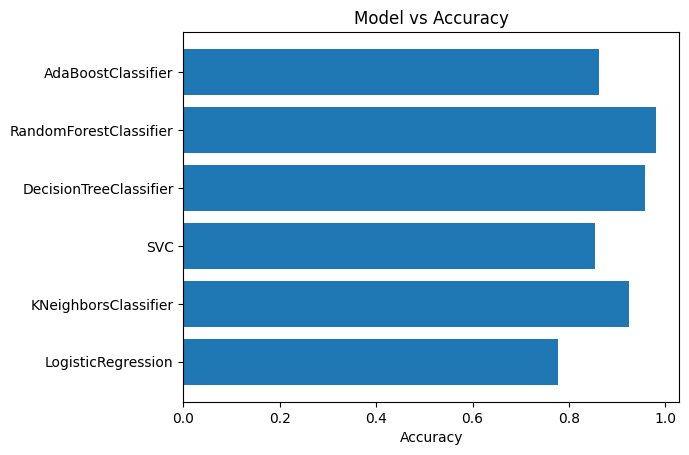

In [ ]:
plt.barh(algos,accuracy)
plt.xlabel("Accuracy")
plt.title("Model vs Accuracy")
plt.show()

RandomForestClassifier has the highest accuracy of 98%

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [ ]:
df.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

**Saving the model**

In [ ]:
import pickle

In [ ]:
filename="model.csv"
pickle.dump(rf,open(filename,"wb"))

In [ ]:
sc="scaler.csv"
pickle.dump(scaler,open(sc,"wb"))

In [ ]:
# loading the model
load=pickle.load(open(filename,"rb"))
lscaler=pickle.load(open(sc,"rb"))

In [ ]:
# prediction=[1.0,1	,1,	30.000000,	2,	1,	2.000000,	4,	3,	3,	2,	6	,1	,1.000000	,3.000000,	120]
prediction=np.array([4.000000	,1	,3,	6.000000	,2	,0,	3.000000	,3	,2,	2	,2	,9	,1	,1.000000,	5.000000	,160])

prediction=np.asarray(prediction)
prediction=prediction.reshape(1,-1)
prediction=lscaler.transform(prediction)
# prediction

prediction=rf.predict(prediction)
if prediction==0:
    print("The customer is a valid customer")
else:
    print("The customer is a churn")

The customer is a churn
